<a href="https://colab.research.google.com/github/abbyaguilar/Income-Prediction-Survey/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pymc3
!pip install mkl-service

In [ ]:
!pip install pandas
import pandas as pd

In [ ]:
file_path = "dataset.csv"
df = pd.read_csv(file_path)

In [ ]:
df = df.iloc[:, :-2]

In [ ]:
df.head()

,Timestamp,Industry:,Years of Professional Experience:,Current Annual Income:,Predicted Annual Income in 5 Years:,Have you used any income prediction models in your professional activities?,Which predictive model would you be more inclined to use?,Do you believe that uncertainty in predictions is a crucial factor in decision-making in your industry?,Optional: Can you share a specific scenario in your professional experience where accurate income prediction would have been beneficial?,Optional: Are there any other specific data points you believe would significantly contribute to the accuracy of an income prediction model?
0,12/1/2023 2:42:21,Retail,10,"Below $30,000","$150,000 - $200,000",No,No preference,Yes,No,No
1,12/1/2023 4:19:57,Healthcare/Pharmaceutical,9,"$100,000 - $150,000","$150,000 - $200,000",No,Traditional Linear Regression,Not Sure,Predicted income could have been an incentive ...,NaN
2,12/1/2023 6:29:02,Finance/Banking,1,"$50,000 - $75,000","$200,000 and above",No,Traditional Linear Regression,Yes,Calculating taxes one would owe based on their...,Location and their average income compared to ...
3,12/1/2023 7:36:14,Technology/IT,5,"$150,000 - $200,000","$150,000 - $200,000",No,Bayesian Linear Regression,Yes,NaN,Total compensation vs just income as a predict...
4,12/1/2023 8:30:39,Marketing/Advertising,2,"$75,000 - $100,000","$100,000 - $150,000",No,No preference/Don’t know,Yes,"Not really, Based on my experience it seems to...",Ask if there was any relation to anyone in the...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                        --------------  ----- 
 0   Timestamp                                                                                                                                     16 non-null     object
 1   Industry:                                                                                                                                     16 non-null     object
 2   Years of Professional Experience:                                                                                                             16 non-null     int64 
 3   Current Annual Income:                    

In [ ]:
df.describe()

,Years of Professional Experience:
count,16.000000
mean,5.562500
std,6.632935
min,0.000000
25%,1.000000
50%,3.000000
75%,7.500000
max,26.000000


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Timestamp                                                                                                                                        0
Industry:                                                                                                                                        0
Years of Professional Experience:                                                                                                                0
Current Annual Income:                                                                                                                           0
Predicted Annual Income in 5 Years:                                                                                                              0
Have you used any income prediction models in your professional activities?                                                                      0
Which predictive model would you be more inclined to use?                                                             

In [ ]:
selected_columns = ['Years of Professional Experience:', 'Current Annual Income:']
selected_df = df[selected_columns]


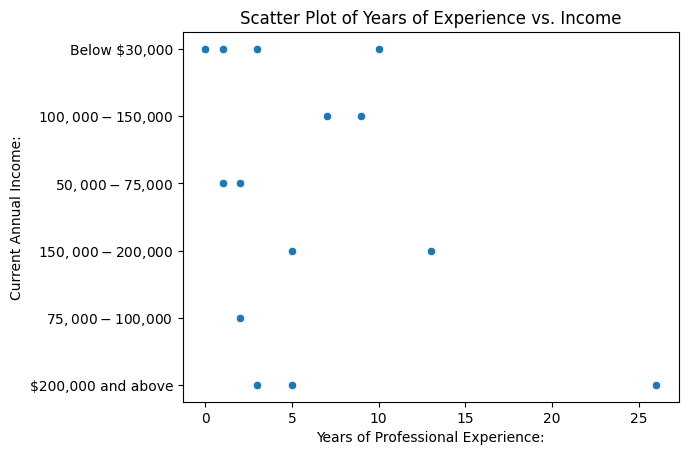

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Years of Professional Experience:', y='Current Annual Income:', data=selected_df)
plt.title('Scatter Plot of Years of Experience vs. Income')
plt.show()


In [ ]:
print(df['Current Annual Income:'].unique())


['Below $30,000' '$100,000 - $150,000' '$50,000 - $75,000'
 '$150,000 - $200,000' '$75,000 - $100,000' '$200,000 and above']


In [ ]:
income_mapping = {
    'Below $30,000': 0,
    '$30,000 - $50,000': 1,
    '$50,000 - $75,000': 2,
    '$75,000 - $100,000': 3,
    '$100,000 - $150,000': 4,
    '$150,000 - $200,000': 5,
    '$200,000 and above': 6
}
df['Current Annual Income:'] = df['Current Annual Income:'].map(income_mapping)


In [ ]:
# Split the data
X = df[['Years of Professional Experience:']]
y = df['Current Annual Income:']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

linear_r2 = r2_score(y_test, linear_predictions)
print(f"Linear Regression R-squared: {linear_r2}")



Linear Regression R-squared: -2.3300008098477476


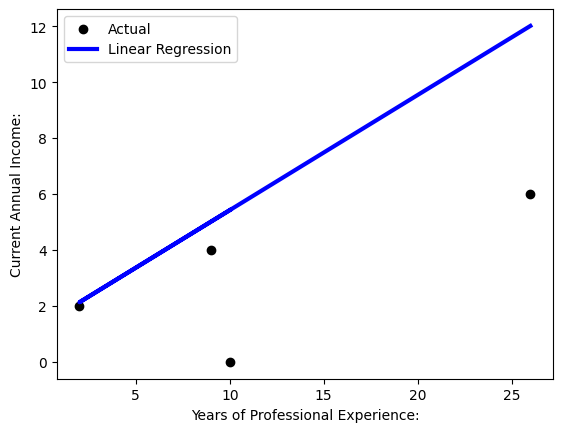

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, linear_predictions, color='blue', linewidth=3, label='Linear Regression')
plt.xlabel('Years of Professional Experience:')
plt.ylabel('Current Annual Income:')
plt.legend()
plt.show()

In [ ]:
import os
os.environ["MKL_THREADING_LAYER"] = "GNU"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pymc3 as pm

In [ ]:
df = pd.read_csv('dataset.csv')
income_mapping = {
    'Below $30,000': 0,
    '$30,000 - $50,000': 1,
    '$50,000 - $75,000': 2,
    '$75,000 - $100,000': 3,
    '$100,000 - $150,000': 4,
    '$150,000 - $200,000': 5,
    '$200,000 and above': 6
}

df['Current Annual Income:'] = df['Current Annual Income:'].map(income_mapping)

X_bayesian = df[['Years of Professional Experience:']]
y_bayesian = df['Current Annual Income:']

X_train_bayesian, X_test_bayesian, y_train_bayesian, y_test_bayesian = train_test_split(X_bayesian, y_bayesian, test_size=0.2, random_state=42)

X_train_np_bayesian = X_train_bayesian.values
y_train_np_bayesian = y_train_bayesian.values

with pm.Model() as bayesian_model:
    alpha = pm.Normal("alpha", mu=0, sd=10)
    beta = pm.Normal("beta", mu=0, sd=10)
    sigma = pm.HalfNormal("sigma", sd=1)

    mu = alpha + beta * X_train_np_bayesian.flatten()

    likelihood = pm.Normal("y", mu=mu, sd=sigma, observed=y_train_np_bayesian)

    trace = pm.sample(2000, tune=1000)

X_test_np_bayesian = X_test_bayesian.values.flatten()

with bayesian_model:
    bayesian_predictions = pm.sample_posterior_predictive(trace)['y']

bayesian_predictions_mean = bayesian_predictions.mean(axis=0)

bayesian_r2 = r2_score(y_test_bayesian, bayesian_predictions_mean[:len(y_test_bayesian)])
print(f"Bayesian Regression R-squared: {bayesian_r2}")


/usr/local/lib/python3.10/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


Bayesian Regression R-squared: 0.24890204923670967


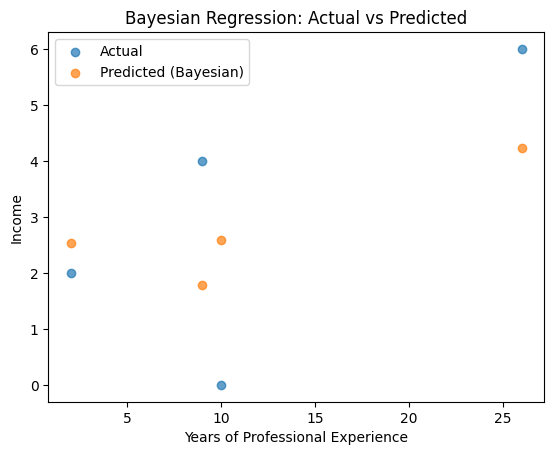

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test_bayesian, y_test_bayesian, label='Actual', alpha=0.7)
plt.scatter(X_test_bayesian, bayesian_predictions_mean[:len(y_test_bayesian)], label='Predicted (Bayesian)', alpha=0.7)
plt.xlabel('Years of Professional Experience')
plt.ylabel('Income')
plt.legend()
plt.title('Bayesian Regression: Actual vs Predicted')
plt.show()